<a href="https://colab.research.google.com/github/FinnRobertson15/Lab-2-Part-3/blob/main/Lab2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)


In [ ]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

In [ ]:
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)


(966, 150)
(322, 150)


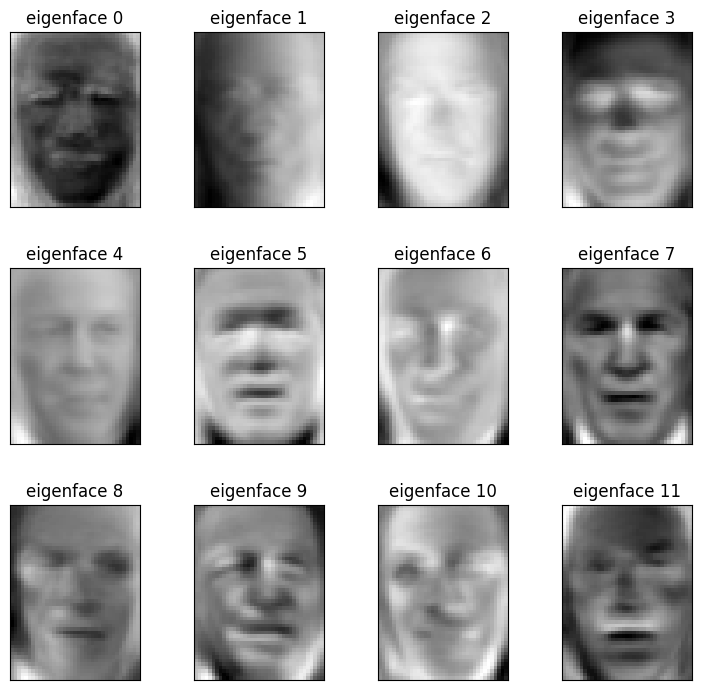

In [ ]:
import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

(966,)


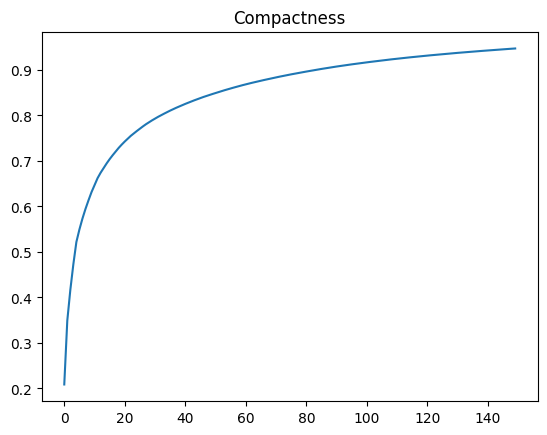

In [ ]:
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
4
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))


Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 4 3 3 3 3 6 3 3 4 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 1 2 1 3 6 3 6 1 3 4 3 5 3 4 1 3 6 6 3 3
 3 2 3 6 1 3 6 3 3 3 3 3 3 3 3 3 5 3 3 3 1 3 1 1 2 6 3 3 3 3 3 3 3 3 3 1 3
 1 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 3 3 3 4 3 3 4 1 2 3 3 1 3 3 3 3
 3 1 1 3 3 3 3 3 6 3 3 3 4 5 5 1 3 2 5 1 3 3 1 3 3 1 5 3 3 3 3 5 3 3 3 3 3
 3 3 3 3 2 5 3 2 3 6 3 3 3 3 3 3 3 3 3 5 1 4 2 6 3 2 5 3 3 3 3 3 3 3 3 3 5
 3 1 1 3 3 3 3 3 3 3 3 3 3 1 3 6 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 6 6 1 6 1 1 1 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 3 5 3 3 3 6 3 3 1 3 3 3 1 3 3 3 1 3 3 3 3 1 3 3 5 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have already preprocessed your data and have X_train, y_train, X_test, y_test

# Define a Sequential model
model = keras.Sequential([
    keras.layers.Dense(150, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(len(target_names), activation='softmax')  # Assuming this is a classification task
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=32, verbose=1)

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1)




Epoch 1/50
31/31 [==============================] - 1s 15ms/step - loss: 1.4868 - accuracy: 0.4700 - val_loss: 1.1290 - val_accuracy: 0.6429
Epoch 2/50
31/31 [==============================] - 0s 10ms/step - loss: 0.8896 - accuracy: 0.6863 - val_loss: 0.7974 - val_accuracy: 0.7484
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 0.4979 - accuracy: 0.8602 - val_loss: 0.6645 - val_accuracy: 0.8012
Epoch 4/50
31/31 [==============================] - 0s 13ms/step - loss: 0.2898 - accuracy: 0.9327 - val_loss: 0.6144 - val_accuracy: 0.7888
Epoch 5/50
31/31 [==============================] - 0s 11ms/step - loss: 0.1943 - accuracy: 0.9482 - val_loss: 0.6388 - val_accuracy: 0.7733
Epoch 6/50
31/31 [==============================] - 0s 12ms/step - loss: 0.1267 - accuracy: 0.9710 - val_loss: 0.6240 - val_accuracy: 0.8012
Epoch 7/50
31/31 [==============================] - 0s 10ms/step - loss: 0.0654 - accuracy: 0.9928 - val_loss: 0.6069 - val_accuracy: 0.8168
Epoch 8/50
31

In [ ]:
# # Create a TensorFlow session and evaluate the tensor to get a NumPy array
# with tf.compat.v1.Session() as sess:
#     predicted_classes_np = sess.run(predicted_classes)

# Calculate and print the classification report
print(classification_report(y_test, predicted_classes, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.62      0.62        13
     Colin Powell       0.79      0.90      0.84        60
  Donald Rumsfeld       0.69      0.67      0.68        27
    George W Bush       0.91      0.93      0.92       146
Gerhard Schroeder       0.82      0.72      0.77        25
      Hugo Chavez       0.92      0.73      0.81        15
       Tony Blair       0.84      0.75      0.79        36

         accuracy                           0.84       322
        macro avg       0.80      0.76      0.78       322
     weighted avg       0.85      0.84      0.84       322



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import time
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 35
learning_rate = 0.1

In [ ]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4, padding_mode='reflect')
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))
])

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='cifar10', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='cifar10', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))

        # Adjust the shortcut connection to match the output dimensions
        shortcut = self.shortcut(x)

        # Add the adjusted shortcut to the output
        out += shortcut

        out = F.relu(out)
        return out

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


In [ ]:
model = ResNet18()
model = model.to(device)

if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))

print(sum([param.nelement() for param in model.parameters()]))
print(model)

Tesla T4
11173962
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, mom

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)
total_step = len(train_loader)
sched_linear_1 = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.005, max_lr=learning_rate, step_size_up=15, step_size_down=15, mode="triangular", verbose=False)
sched_linear_3 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.005/learning_rate, end_factor=0.005/learning_rate, verbose=False)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[sched_linear_1, sched_linear_3], milestones=[30])

In [ ]:
model.train()
print("Training")
start = time.time()

for epoch in range(num_epochs):

  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
      print(f"Epoch [{epoch + 1} / {num_epochs}], Step [{i + 1} / {total_step} Loss {loss.item()}]")

  scheduler.step()
end = time.time()

print(round((end - start) / 60, 2))

Training
Epoch [1 / 35], Step [100 / 391 Loss 1.5237454175949097]
Epoch [1 / 35], Step [200 / 391 Loss 1.4601621627807617]
Epoch [1 / 35], Step [300 / 391 Loss 1.116984248161316]
Epoch [2 / 35], Step [100 / 391 Loss 1.145886778831482]
Epoch [2 / 35], Step [200 / 391 Loss 1.1045145988464355]
Epoch [2 / 35], Step [300 / 391 Loss 0.7534907460212708]
Epoch [3 / 35], Step [100 / 391 Loss 0.9323672652244568]
Epoch [3 / 35], Step [200 / 391 Loss 0.7110790014266968]
Epoch [3 / 35], Step [300 / 391 Loss 0.7549437284469604]
Epoch [4 / 35], Step [100 / 391 Loss 0.7535264492034912]
Epoch [4 / 35], Step [200 / 391 Loss 0.5443445444107056]
Epoch [4 / 35], Step [300 / 391 Loss 0.7308687567710876]
Epoch [5 / 35], Step [100 / 391 Loss 0.5816777944564819]
Epoch [5 / 35], Step [200 / 391 Loss 0.6116618514060974]
Epoch [5 / 35], Step [300 / 391 Loss 0.5547544360160828]
Epoch [6 / 35], Step [100 / 391 Loss 0.4293399155139923]
Epoch [6 / 35], Step [200 / 391 Loss 0.6671981811523438]
Epoch [6 / 35], Step [30

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch [31 / 35], Step [100 / 391 Loss 0.05415192246437073]
Epoch [31 / 35], Step [200 / 391 Loss 0.04384193196892738]
Epoch [31 / 35], Step [300 / 391 Loss 0.0609213151037693]
Epoch [32 / 35], Step [100 / 391 Loss 0.04181261733174324]
Epoch [32 / 35], Step [200 / 391 Loss 0.024678148329257965]
Epoch [32 / 35], Step [300 / 391 Loss 0.04094843938946724]
Epoch [33 / 35], Step [100 / 391 Loss 0.11540934443473816]
Epoch [33 / 35], Step [200 / 391 Loss 0.04688412696123123]
Epoch [33 / 35], Step [300 / 391 Loss 0.021420439705252647]
Epoch [34 / 35], Step [100 / 391 Loss 0.07448803633451462]
Epoch [34 / 35], Step [200 / 391 Loss 0.043178100138902664]
Epoch [34 / 35], Step [300 / 391 Loss 0.021484926342964172]
Epoch [35 / 35], Step [100 / 391 Loss 0.0683521255850792]
Epoch [35 / 35], Step [200 / 391 Loss 0.014211490750312805]
Epoch [35 / 35], Step [300 / 391 Loss 0.0424172542989254]
-1518.8323831558228


In [ ]:
print("Testing")
start = time.time()
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    img = images.to(device)
    labels = labels.to(device)
    output = model(img)
    _, predicted = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f"Accuracy: {100 * correct / total}")

end = time.time()
print(end - start)

Testing
Accuracy: 93.78%
Testing time: 8.201112508773804


In [ ]:
from google.colab import files
uploaded = files.upload()

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/keras_png_slices_data

/content/drive/MyDrive/keras_png_slices_data


In [ ]:
!ls

keras_png_slices_seg_test      keras_png_slices_test
keras_png_slices_seg_train     keras_png_slices_train
keras_png_slices_seg_validate  keras_png_slices_validate


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fast = True
learning_rate = 0.15 if fast else 0.1
num_epochs = 2 if fast else 5
# num_epochs = 1

In [ ]:
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_paths[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

def seperate(input_tensor):
    result_tensor = torch.zeros_like(input_tensor, dtype=torch.float32)
    result_tensor[input_tensor < 0.25] = 0
    result_tensor[(input_tensor >= 0.25) & (input_tensor < 0.5)] = 1
    result_tensor[(input_tensor >= 0.5) & (input_tensor < 0.75)] = 2
    result_tensor[input_tensor >= 0.75] = 3

    return result_tensor

def one_hot(seg_map):
    num_classes = 4  # Number of classes
    seg_map = seg_map.squeeze(0)  # Remove batch dimension if present
    one_hot = torch.zeros(num_classes, seg_map.size(0), seg_map.size(1))

    for class_idx in range(num_classes):
        one_hot[class_idx] = (seg_map == class_idx).float()

    return one_hot

size = 128 if fast else 256

transform_X = transforms.Compose([
    transforms.Resize((size, size)),  # Resize the image to the desired size
    transforms.ToTensor(),         # Convert the image to a tensor
    transforms.Lambda(lambda x: x / 255.0),
    transforms.Lambda(lambda x: (x - x.mean()) / x.std())  # Subtract mean and divide by standard deviation
])

transform_Y = transforms.Compose([
    transforms.Resize((size, size)),  # Resize the image to the desired size
    transforms.ToTensor(),            # Convert the image to a tensor
    transforms.Lambda(lambda x: seperate(x)),
    transforms.Lambda(one_hot)
])



X_train = CustomDataset(root_dir=r'keras_png_slices_train', transform=transform_X)
Y_train  = CustomDataset(root_dir=r'keras_png_slices_seg_train', transform=transform_Y)
X_train_loader = DataLoader(X_train, batch_size=32, shuffle=False)
Y_train_loader = DataLoader(Y_train, batch_size=32, shuffle=False)

X_test = CustomDataset(root_dir=r'keras_png_slices_test', transform=transform_X)
Y_test  = CustomDataset(root_dir=r'keras_png_slices_seg_test', transform=transform_Y)
X_test_loader = DataLoader(X_test, batch_size=32, shuffle=False)
Y_test_loader = DataLoader(Y_test, batch_size=32, shuffle=False)

In [ ]:
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels, initial_size=64, layer_count = 1):
        super(UNet, self).__init__()
        self.size = initial_size

        self.down = nn.ModuleList()
        # Initial down layer
        self.down.append(self._make_layer(in_channels, self.size, self.size, False))
        # Extra down layers
        for i in range(layer_count - 1):
          self.down.append(self._make_layer(self.size, self.size * 2, self.size * 2, False))
        # Middle layer / Initial up layer
        self.mid = self._make_layer(self.size, self.size * 2, self.size, True)

        self.up = nn.ModuleList()
        # Extra up layers
        for i in range(layer_count - 1):
          self.up.append(self._make_layer(self.size * 2, self.size, self.size // 2, True))
        # Output layer
        self.up.append(self._make_layer(self.size * 2, self.size, out_channels, None))

    def _make_layer(self, in_channels, mid_channels, out_channels, up):
        layers = []
        layers.append(nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(mid_channels, mid_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU(inplace=True))

        if up is None:
            layers.append(nn.Conv2d(mid_channels, out_channels, kernel_size=1))
        elif up:
            layers.append(nn.ConvTranspose2d(mid_channels, out_channels, kernel_size=4, stride=2, padding=1))
        self.size = out_channels
        return nn.Sequential(*layers)

    def copy(self, toCopy):
        copied = toCopy.clone()
        return nn.MaxPool2d(kernel_size=2, stride=2)(toCopy), copied

    def crop_cat(self, toCrop, toCat):
        cropped = toCrop[:, :, :toCat.size(2), :toCat.size(3)]
        return torch.cat([toCat, cropped], dim=1)

    def forward(self, x):
      copies = []
      result = x
      for layer in self.down:
        result = layer(result)
        result, copy = self.copy(result)
        copies.append(copy)

      result = self.mid(result)

      copies.reverse()
      for i, layer in enumerate(self.up):
        result = layer(self.crop_cat(copies[i], result))

      return result


In [ ]:
layer_count = 1 if fast else 2
# Create an instance of the U-Net model
model = UNet(in_channels=1, out_channels=4, layer_count=layer_count)  # Example with 3 input channels and 1 output channel

# Print the model architecture
if device.type == 'cuda':
  print(torch.cuda.get_device_name(0))
  model = model.to(device)

print(sum([param.nelement() for param in model.parameters()]))
print(model)

Tesla T4
501124
UNet(
  (down): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
  )
  (mid): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
  (up): ModuleList(
    (0): Sequential(
      (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
    )
  )
)


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)
total_step = len(X_train_loader)
sched_linear_1 = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.005, max_lr=learning_rate, step_size_up=15, step_size_down=15, mode="triangular", verbose=False)
sched_linear_3 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.005/learning_rate, end_factor=0.005/learning_rate, verbose=False)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[sched_linear_1, sched_linear_3], milestones=[30])


In [ ]:
model.train()
print("Training")
start = time.time()

for epoch in range(num_epochs):
  # s = False
  # if s:
  #   break
  for i, (images, seg) in enumerate(zip(X_train_loader, Y_train_loader)):
    # if s:
    #   break
    # s = True
    images = images.to(device)
    seg = seg.to(device)
    outputs = model(images)
    loss = criterion(outputs, seg)
    # print(outputs)
    # print(seg)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 10 == 0:
      print(f"Epoch [{epoch + 1} / {num_epochs}], Step [{i + 1} / {total_step} Loss {loss.item()}]")

  scheduler.step()
end = time.time()

print(round((end - start) / 60, 2))

Training
Epoch [1 / 2], Step [10 / 302 Loss 1.3480193614959717]
Epoch [1 / 2], Step [20 / 302 Loss 1.1453520059585571]
Epoch [1 / 2], Step [30 / 302 Loss 0.6490684151649475]
Epoch [1 / 2], Step [40 / 302 Loss 0.5202064514160156]
Epoch [1 / 2], Step [50 / 302 Loss 0.47761648893356323]
Epoch [1 / 2], Step [60 / 302 Loss 0.5120151042938232]
Epoch [1 / 2], Step [70 / 302 Loss 0.628484845161438]
Epoch [1 / 2], Step [80 / 302 Loss 0.42630061507225037]
Epoch [1 / 2], Step [90 / 302 Loss 0.38481825590133667]
Epoch [1 / 2], Step [100 / 302 Loss 0.537479817867279]
Epoch [1 / 2], Step [110 / 302 Loss 0.44764524698257446]
Epoch [1 / 2], Step [120 / 302 Loss 0.43080300092697144]
Epoch [1 / 2], Step [130 / 302 Loss 0.3095517158508301]
Epoch [1 / 2], Step [140 / 302 Loss 0.41886138916015625]
Epoch [1 / 2], Step [150 / 302 Loss 0.30570894479751587]
Epoch [1 / 2], Step [160 / 302 Loss 0.33158814907073975]
Epoch [1 / 2], Step [170 / 302 Loss 0.2600957751274109]
Epoch [1 / 2], Step [180 / 302 Loss 0.3774

In [ ]:
import matplotlib.pyplot as plt
def vizualize(img, val = True):
  image_numpy = img.cpu().numpy()

  image_numpy = (image_numpy - image_numpy.min()) / (image_numpy.max() - image_numpy.min())

  plt.imshow(image_numpy[0], cmap='gray')
  plt.axis('off')
  plt.show()

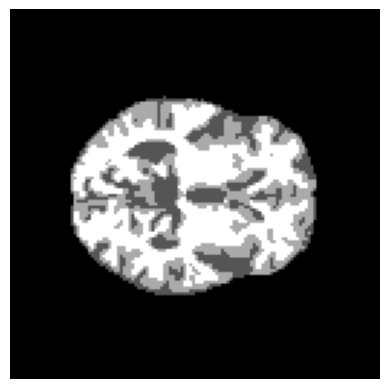

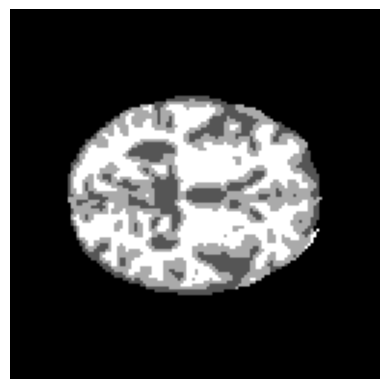

Average Dice Coefficient: 0.9454


In [ ]:
model.eval()
s = False
with torch.no_grad():
    dice_coeff_sum = 0.0
    num_samples = 0
    # s = False
    for i, (images, seg) in enumerate(zip(X_train_loader, Y_train_loader)):
        # if s:
        #   break
        # s = True
        img = images.to(device)
        seg = seg.to(device)
        output = model(img)
        _, predicted = torch.max(output.data, 1)
        _, segmax = torch.max(seg, 1)
        output_one_hot = torch.nn.functional.one_hot(predicted, num_classes=4)
        seg_one_hot = torch.nn.functional.one_hot(segmax, num_classes=4)
        # print(seg)
        # print(output.data)
        if not s:
          vizualize(segmax[0].unsqueeze(0))
          vizualize(predicted[0].unsqueeze(0))
          s = True
        # Calculate Dice coefficient for each image in the batch
        dice_coeff = 2.0 * (output_one_hot * seg_one_hot).sum() / (output_one_hot.sum() + seg_one_hot.sum())

        dice_coeff_sum += dice_coeff.item()
        num_samples += 1

    # Calculate the average Dice coefficient
    average_dice_coeff = dice_coeff_sum / num_samples

    print(f"Average Dice Coefficient: {average_dice_coeff:.4f}")

In [18]:
!cd ..

In [19]:
!ls

sample_data


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
import os
from PIL import Image
import numpy as np
import zipfile
import io
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
fast = True
learning_rate = 0.15 if fast else 0.1
num_epochs = 2 if fast else 5
# num_epochs = 1

class CustomDataset(Dataset):
    def __init__(self, zip_file, data_folder, transform=None):
      self.zip_file = zip_file
      self.data_folder = data_folder
      self.transform = transform
      self.data_paths = self.get_data_paths()

    def get_data_paths(self):
        data_paths = []
        with zipfile.ZipFile(self.zip_file, 'r') as archive:
            for file_info in archive.infolist():
                if file_info.filename.startswith(self.data_folder) and file_info.filename.endswith('.png'):
                    data_paths.append(file_info.filename)
        return data_paths


    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        with zipfile.ZipFile(self.zip_file, 'r') as archive:
            data_img_data = archive.read(self.data_paths[idx])

            data_image = Image.open(io.BytesIO(data_img_data))

        if self.transform:
            data_image = self.transform(data_image)

        return data_image

def separate(input_tensor):
    result_tensor = torch.zeros_like(input_tensor, dtype=torch.float32)
    result_tensor[input_tensor < 0.25] = 0
    result_tensor[(input_tensor >= 0.25) & (input_tensor < 0.5)] = 1
    result_tensor[(input_tensor >= 0.5) & (input_tensor < 0.75)] = 2
    result_tensor[input_tensor >= 0.75] = 3

    return result_tensor

def one_hot(seg_map):
    num_classes = 4  # Number of classes
    seg_map = seg_map.squeeze(0)  # Remove batch dimension if present
    one_hot = torch.zeros(num_classes, seg_map.size(0), seg_map.size(1))

    for class_idx in range(num_classes):
        one_hot[class_idx] = (seg_map == class_idx).float()

    return one_hot

size = 128 if fast else 256

transform_X = transforms.Compose([
    transforms.Resize((size, size)),  # Resize the image to the desired size
    transforms.ToTensor(),            # Convert the image to a tensor
    transforms.Lambda(lambda x: x / 255.0),
    transforms.Lambda(lambda x: (x - x.mean()) / x.std())  # Subtract mean and divide by standard deviation
])

transform_Y = transforms.Compose([
    transforms.Resize((size, size)),  # Resize the image to the desired size
    transforms.ToTensor(),            # Convert the image to a tensor
    transforms.Lambda(lambda x: separate(x)),
    transforms.Lambda(one_hot)
])

# Specify the path to your zipped folder
zip_file_path = 'keras_png_slices_data.zip'

X_train = CustomDataset(zip_file=zip_file_path, data_folder='keras_png_slices_train', transform=transform_X)
Y_train = CustomDataset(zip_file=zip_file_path, data_folder='keras_png_slices_seg_train', transform=transform_Y)
X_train_loader = DataLoader(X_train, batch_size=32, shuffle=False)
Y_train_loader = DataLoader(Y_train, batch_size=32, shuffle=False)

# You can do the same for test data if needed


In [33]:
for i in Y_train_loader:
  print(i)

In [ ]:
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels, initial_size=64, layer_count = 1):
        super(UNet, self).__init__()
        self.size = initial_size

        self.down = nn.ModuleList()
        # Initial down layer
        self.down.append(self._make_layer(in_channels, self.size, self.size, False))
        # Extra down layers
        for i in range(layer_count - 1):
          self.down.append(self._make_layer(self.size, self.size * 2, self.size * 2, False))
        # Middle layer / Initial up layer
        self.mid = self._make_layer(self.size, self.size * 2, self.size, True)

        self.up = nn.ModuleList()
        # Extra up layers
        for i in range(layer_count - 1):
          self.up.append(self._make_layer(self.size * 2, self.size, self.size // 2, True))
        # Output layer
        self.up.append(self._make_layer(self.size * 2, self.size, out_channels, None))

    def _make_layer(self, in_channels, mid_channels, out_channels, up):
        layers = []
        layers.append(nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU(inplace=True))
        layers.append(nn.Conv2d(mid_channels, mid_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU(inplace=True))

        if up is None:
            layers.append(nn.Conv2d(mid_channels, out_channels, kernel_size=1))
        elif up:
            layers.append(nn.ConvTranspose2d(mid_channels, out_channels, kernel_size=4, stride=2, padding=1))
        self.size = out_channels
        return nn.Sequential(*layers)

    def copy(self, toCopy):
        copied = toCopy.clone()
        return nn.MaxPool2d(kernel_size=2, stride=2)(toCopy), copied

    def crop_cat(self, toCrop, toCat):
        cropped = toCrop[:, :, :toCat.size(2), :toCat.size(3)]
        return torch.cat([toCat, cropped], dim=1)

    def forward(self, x):
      copies = []
      result = x
      for layer in self.down:
        result = layer(result)
        result, copy = self.copy(result)
        copies.append(copy)

      result = self.mid(result)

      copies.reverse()
      for i, layer in enumerate(self.up):
        result = layer(self.crop_cat(copies[i], result))

      return result
